### Simple Linear Regression

#### Sample Dataset

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membuat datframe

pizza = {'diameter (inch)': [6, 8, 10, 14, 18],
        'harga ($)': [7, 9, 13, 17.5, 18]}
# Mengubah data menjadi table
pizza_df = pd.DataFrame(pizza) 
pizza_df

,diameter (inch),harga ($)
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Tujuan, akan ditentukan harga pizza jika diketahui diameternya. Jadi kolom diameter berperan sebagai futures, dan kolom harga berperan sebagai target.

#### Menetapkan variabel futures (X) dan variabel target (y)

In [2]:
# Futures (X)
X = pizza_df[["diameter (inch)"]]
# Target (y)
y = pizza_df[["harga ($)"]]

#### Visualisai data

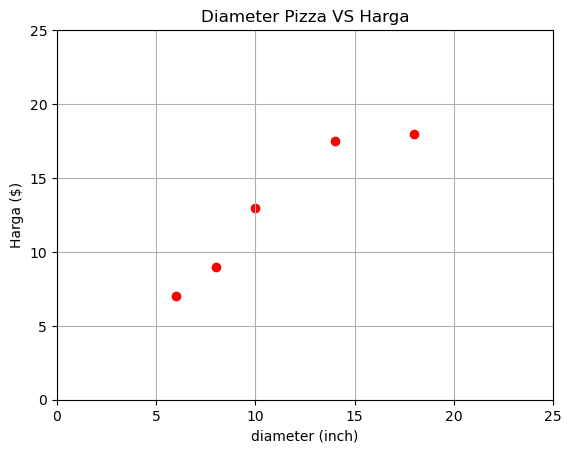

In [3]:
plt.scatter(X,y, color="red")
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.title("Diameter Pizza VS Harga")
plt.xlabel("diameter (inch)")
plt.ylabel("Harga ($)")
plt.grid(True)
plt.show()

#### Traininig Simple Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

#### Visualisai Simple Linear Regression

In [5]:
X_vis = np.array([0, 25]).reshape(-1,1) # membuat data array X_vis dan di reshape agar menjadi 2 dimensi
y_vis = model.predict(X_vis)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


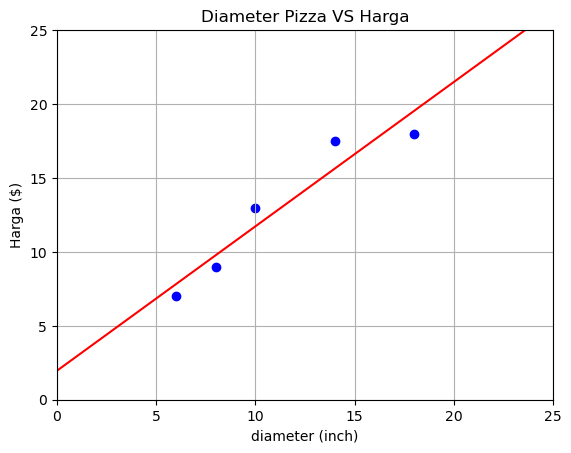

In [6]:
plt.scatter(X,y, color= 'blue')
plt.plot(X_vis, y_vis, '-r')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.title("Diameter Pizza VS Harga")
plt.xlabel("diameter (inch)")
plt.ylabel("Harga ($)")
plt.grid(True)
plt.show()

kita akan fokus pada garis linear berwarna merah diatas
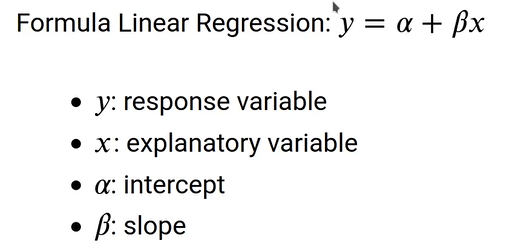

nilai alpha juga merepresentasikan nilai y saat x = 0.

In [7]:
X

,diameter (inch)
0,6
1,8
2,10
3,14
4,18


In [8]:
# Untuk mendapat nilai intercept
X = X.values.flatten() # Mengubah kolom futures menjadi 1 dimensi
y = y.values.flatten()
print(f'intercept: {model.intercept_}')
# Untuk mendapat nilai slope
print(f'slope: {model.coef_}')

intercept: [1.96551724]
slope: [[0.9762931]]


#### Mencari Nilai Slope
Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan rumus berikut:
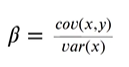

dimana:

x = futures

y = target


In [9]:
# Hitung variansi futures
var_X = np.var(X, ddof = 1) # ddof = degree of fredom (derajat kebebasan) disetting 1
print(f'Variansi: {var_X}')

Variansi: 23.2


In [10]:
# Hitung covariansi
cov_xy = np.cov(X,y)
cov_xy

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

Nilai covariansi yang akan digunakan adalah 22.65.

In [11]:
# Maka covariansinya adalah
cov_xy = np.cov(X,y)[0][1]
print(f'Covariansi Xy: {cov_xy}') 

Covariansi Xy: 22.65


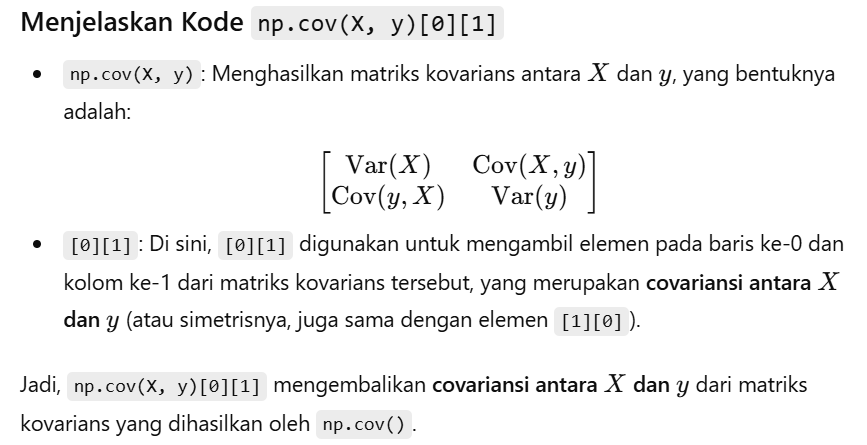

In [12]:
# Maka dapat dihitung nilai slope
# Menggunakan rumus yang diberikan di awal
slope = cov_xy/var_X
print("Nilai slope:",slope) 

Nilai slope: 0.9762931034482758


#### Mencari Nilai Intercept
Nilai intercept pada Linear Regression bisa diperoleh dengan menggunakan rumus berikut:

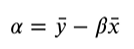

In [13]:
# Maka intercept 
intercept = np.mean(y)- slope*np.mean(X)
print("intercept:",intercept)

intercept: 1.9655172413793114


####  Prediksi Harga Pizza

In [14]:
# Pertama kembalikan variabel X dan y menjadi 2 dimensi
X = X.reshape(-1,1)
y = y.reshape(-1,1)
diameter_pizza = np.array([12, 13, 16]).reshape(-1,1)
diameter_pizza

array([[12],
       [13],
       [16]])

In [15]:
# prediksi harga
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.68103448],
       [14.65732759],
       [17.5862069 ]])

In [16]:
# Agar lebih mudah dibaca, berikut akan didemokan code yang akan menyederhanakannya
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diamemeter: {dmtr} prediksi harga : {hrg}')

Diamemeter: [12] prediksi harga : [13.68103448]
Diamemeter: [13] prediksi harga : [14.65732759]
Diamemeter: [16] prediksi harga : [17.5862069]


#### Evaluasi Performa Regression Model

##### Training & Testing data

In [17]:
# X_train dan y_train menggunakan data X dan y di awal
X_train = X
y_train = y

# Membuat dat testing
X_test = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11]).reshape(-1,1)

#### Training Simple Linear Regression Model

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Evaluasi Linear Regression dengan Coefficient of Determination atay R-squared

In [19]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


Nilai r_squared semakin mendekati 1 semakin baik, seballiknya semakin menjauhi 1 semakin buruk.

#### Mencari nilai R-aquared
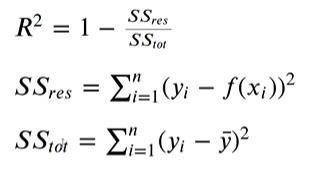

SS = Subsquared

res = residual

tot = total

#### SS res

In [20]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2 for x_i, y_i in zip(X_test, y_test)])

In [21]:
print(f'ss_res: {ss_res}')

ss_res: [19.19809936]


#### SS_tot

In [22]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f'ss_tot: {ss_tot}')

ss_tot: [56.8]


#### Maka R-squared 

In [23]:
r_squared = 1 - ss_res/ss_tot
print(f'r_quared: {r_squared}')

r_quared: [0.66200529]
